In [93]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import numpy as np

This data is about detailed information of cars from 1985 Ward's Automotive Yearbook, and the features included ranging from manufature,aspiration to price. 
============

And it contains 206 entries and each entry has 26 features.
============

In [85]:
car=pd.read_csv('./Automobile_data.csv')
print("The shape of dataset :{}".format(car.shape))
print(car.head())
print(car.info())

The shape of dataset :(205, 26)
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bo

# Though this data set dosen't have any missing data, but there are still a few unknow data which represented by '?' 

 ### ( Following are some preprocessing with the missing data. Without doing so, a lot of plots in this homework cannot be properly drawn)

In [89]:
clean_by_mean=['price','horsepower','bore','stroke','peak-rpm']
for name in clean_by_mean[0:2]:
    a=car[car[name]!='?']
    b=(a[name].astype(int)).mean()
    car[name]=car[name].replace('?',b).astype(int)
    print(name,':',car[car[name]!='?'].shape)
    
for name in clean_by_mean[2:]:
    a=car[car[name]!='?']
    b=(a[name].astype(float)).mean()
    car[name]=car[name].replace('?',b).astype(float)
    print(name,':',car[car[name]!='?'].shape)
a=car['num-of-doors'].map({'two':2,'four':4,'?':4})
car['num-of-doors']=a

price : (205, 26)
horsepower : (205, 26)
bore : (205, 26)
stroke : (205, 26)
peak-rpm : (205, 26)


----
# Then we want to understand the range of important features:
* Curb weight : Is the total weight of the vehicle without the weight of the passenger.
* Engine Size: It is the amount of air that can be sucked in by the engine.
* Highway-mpg: It is the kilometer or miles that a car can travel with one liter of fuel on the highway
* Horse Power: It is the measure of the power of the engine
* Peak rpm: RPM (Reolutions per minute) is the measure of the speed of roation of Engine per minute
* Price: In US today the median price of the vehicle is around 35000.This is a old data so it shows very low median car price.


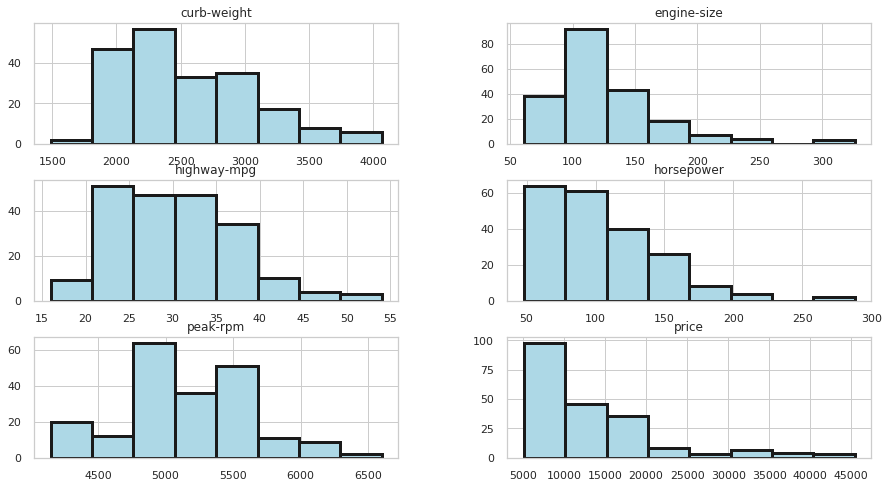

In [90]:
plt=car[['engine-size','peak-rpm','curb-weight','horsepower','price','highway-mpg']].hist(figsize=(15,8),bins=8,color='lightblue',linewidth='3',edgecolor='k')


---
# Which company sells most cars?  

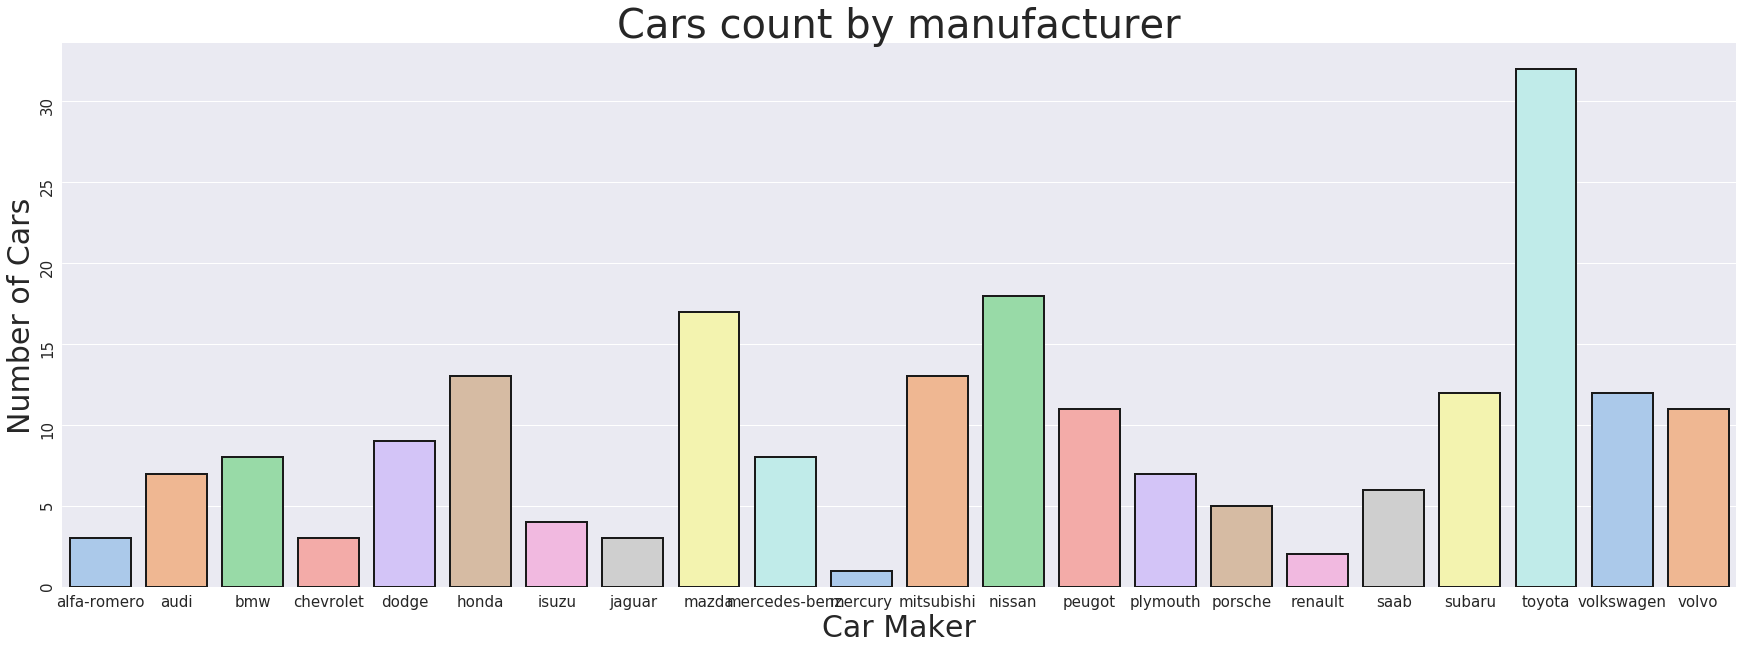

In [94]:
plt.figure(figsize=(30, 10))
ax=sns.countplot(car['make'],palette='pastel',edgecolor='k',linewidth=2)
plt.xticks(rotation='horizontal')
plt.xlabel('Car Maker',fontsize=30)
plt.ylabel('Number of Cars',fontsize=30)
plt.title('Cars count by manufacturer',fontsize=40)
ax.tick_params(labelsize=15,)
plt.yticks(rotation='vertical')
plt.show()


**We can see that Toyota is the most prolicfic company.**

---

Next, I want to about the what proportion they account for the following features:
* engine-type, 
* number-of-door,
* fuel-type
* body-style


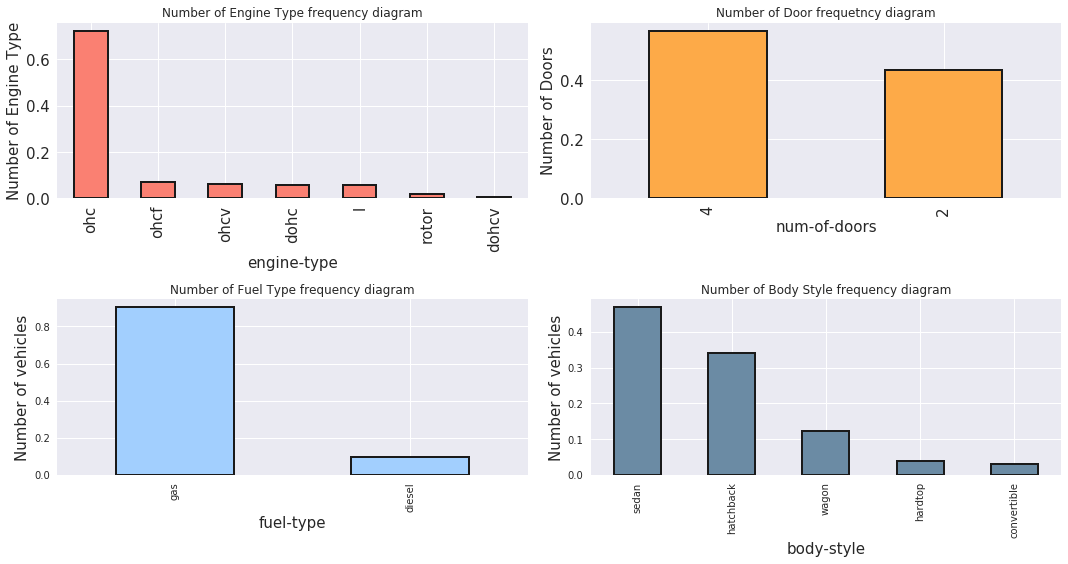

In [95]:
plt.subplot(221)
ax1=car['engine-type'].value_counts(normalize=True).plot(figsize=(15,8),kind='bar',color='salmon',edgecolor='k',linewidth=2)
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type',fontsize=15)
ax1.tick_params(labelsize=15)
plt.xlabel('engine-type',fontsize=15);


plt.subplot(222)
ax2=car['num-of-doors'].value_counts(normalize=True).plot(figsize=(15,8),kind='bar',color='#fdaa48',edgecolor='k',linewidth=2)
plt.title("Number of Door frequetncy diagram")
plt.ylabel('Number of Doors',fontsize=15)
ax2.tick_params(labelsize=15)
plt.xlabel('num-of-doors',fontsize=15);

plt.subplot(223)
ax3=car['fuel-type'].value_counts(normalize= True).plot(figsize=(15,8),kind='bar',color='#a2cffe',edgecolor='k',linewidth=2)
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles',fontsize=15)
plt.xlabel('fuel-type',fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplot(224)
ax4=car['body-style'].value_counts(normalize=True).plot(figsize=(15,8),kind='bar',color='#6b8ba4',edgecolor='k',linewidth=2)
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles',fontsize=15)
plt.xlabel('body-style',fontsize=15);
plt.tight_layout()
plt.show()

-----
# Following we want to see the fuel economy of different car makers

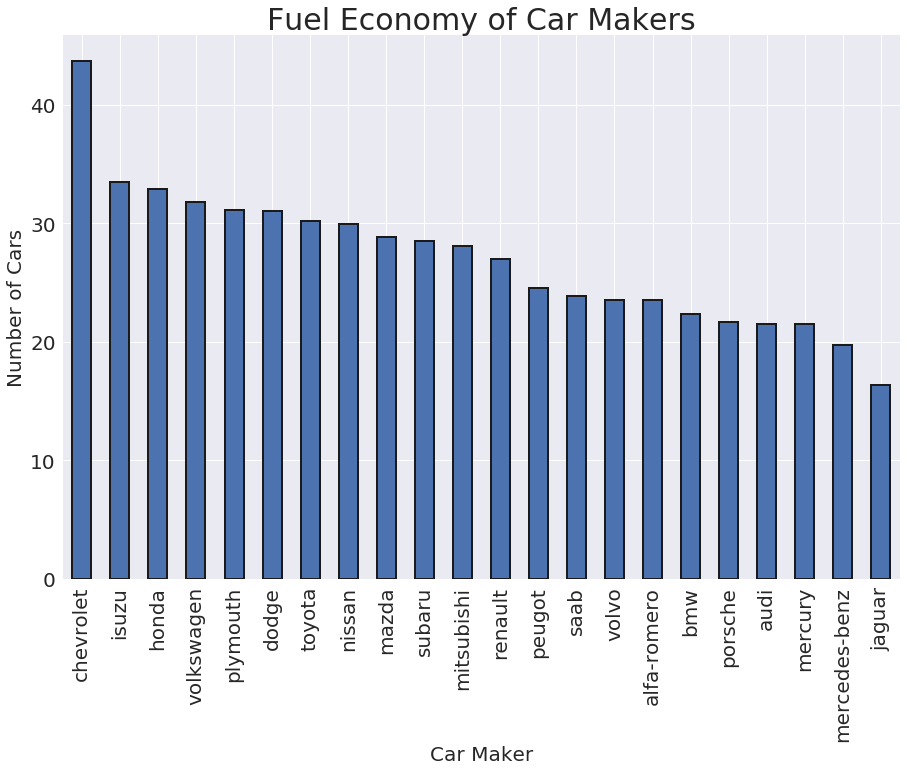

In [96]:
fig = plt.figure(figsize=(15, 10))
mileage=car.groupby(['make']).mean()
mileage['avg-mpg']=((mileage['city-mpg']+mileage['highway-mpg'])/2)
ax=mileage['avg-mpg'].sort_values(ascending=False).plot.bar(edgecolor='k',linewidth=2)
plt.xticks(rotation='vertical')
plt.xlabel('Car Maker',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Fuel Economy of Car Makers',fontsize=30)
ax.tick_params(labelsize=20)
#plt.yticks(rotation='vertical')
plt.show()
plt.show()

**And we can find out that chevrolet's cars are the most efficient on the fuel economy** 

---

# Then I want to know the relation between the number of cylinder and the horsepower


/home/brian/.local/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


num-of-cylinders : (205, 26)
0      4.0
1      4.0
2      6.0
3      4.0
4      5.0
      ... 
200    4.0
201    4.0
202    6.0
203    6.0
204    4.0
Name: num-of-cylinders, Length: 205, dtype: float64


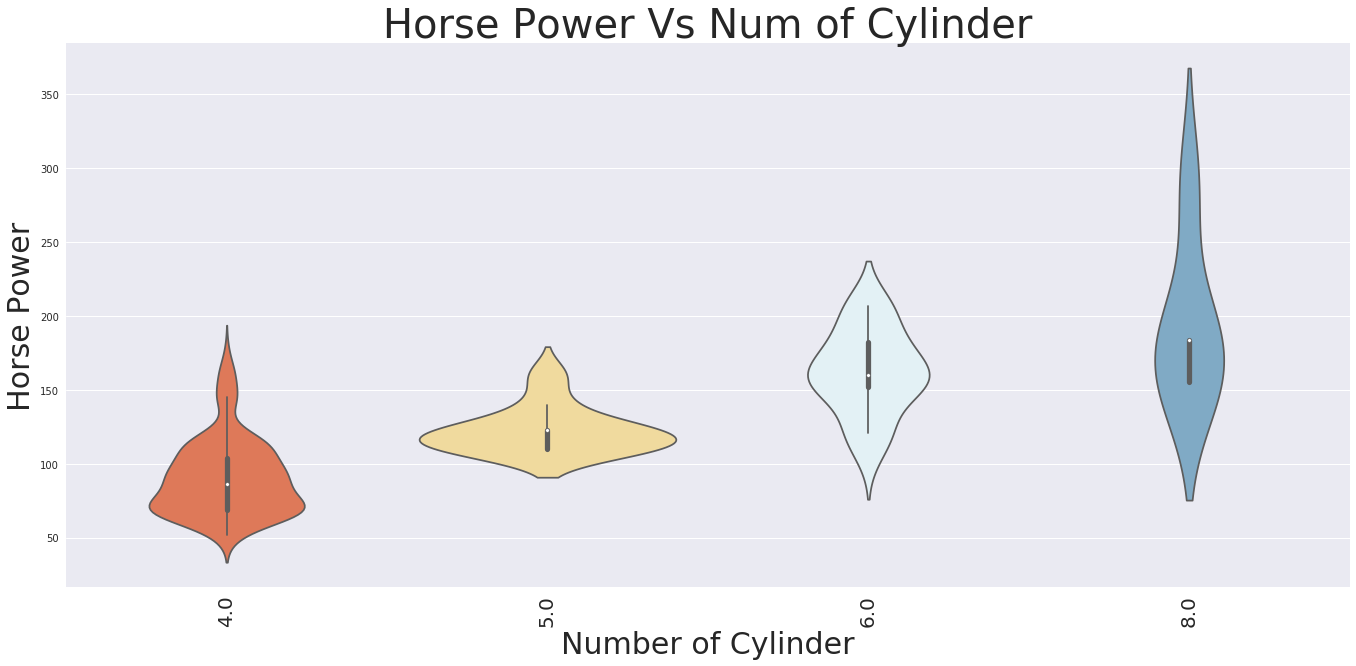

In [98]:
## Cleaning the missing data for horse power and number of cylinder
a=car['num-of-cylinders'].map({'four':4,'five':5,'six':6,'eight':8,'?':4})
car['num-of-cylinders']=a
print('num-of-cylinders :',car[car['num-of-cylinders']!='?'].shape)


plt.rcParams['figure.figsize']=(23,10)
print(car["num-of-cylinders"])
ax=sns.violinplot(data=car, x="num-of-cylinders", y="horsepower",palette=sns.color_palette("RdYlBu", 4))
ax.set_xlabel('Number of Cylinder',fontsize=30)
ax.set_ylabel('Horse Power',fontsize=30)
plt.title('Horse Power Vs Num of Cylinder',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)


**And we can find out that the number of cylinders do have direct impact on the horsepower.However,the difference between 5 cylinders cars and 4 cylinders cara is not significant. From 6 cylinders and so on can really tell that huge difference.**

----

# At last, I want to know that how much the brand of the car will affect its selling price.

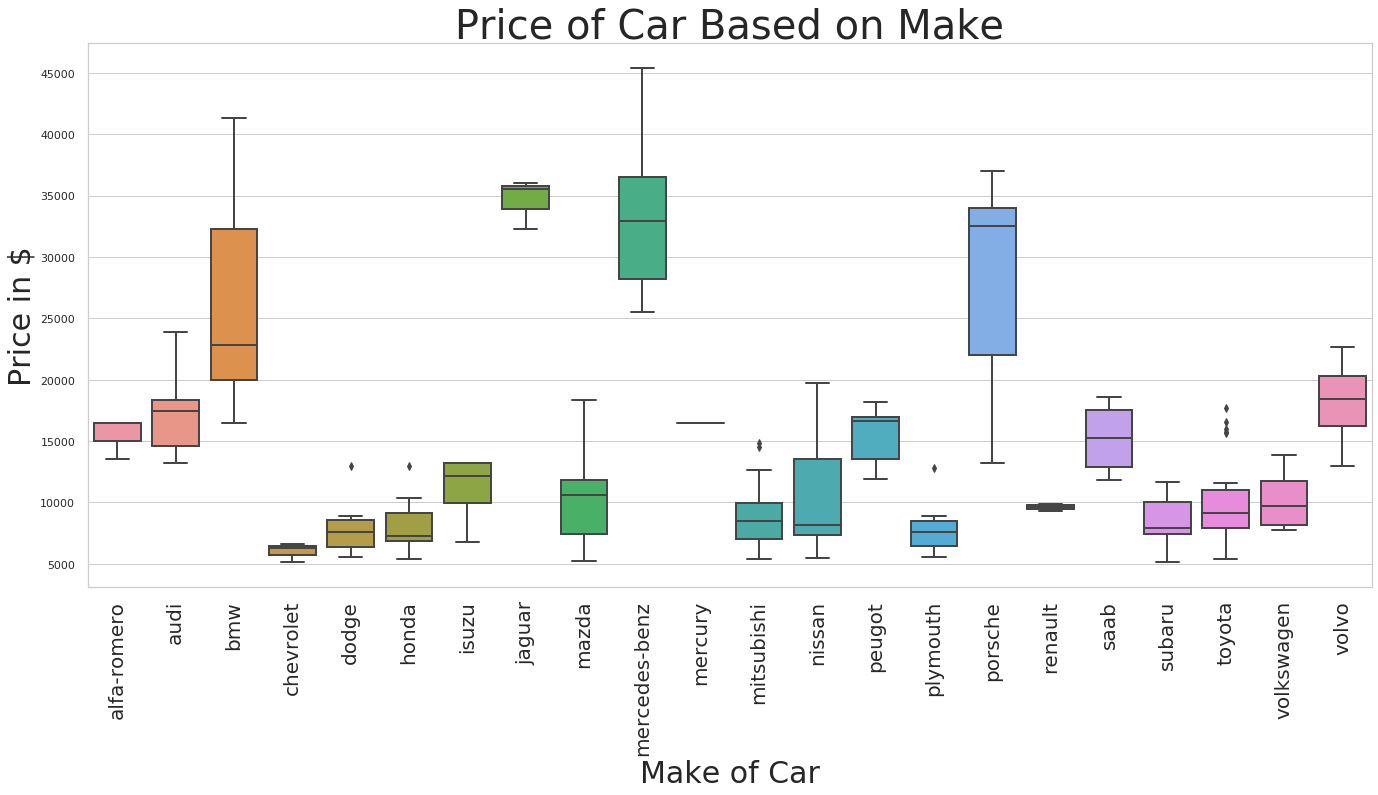

In [69]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=car,width=0.8,linewidth=2)
ax.set_xlabel('Make of Car',fontsize=30)
ax.set_ylabel('Price in $',fontsize=30)
plt.title('Price of Car Based on Make',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)

And We can still find out that brands do have huge impact on the price of the cars. Among them, BMW,Benz,Jaguar,Porsche are the most expensive cars.